In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold,GridSearchCV,train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LarsCV,LassoCV,LinearRegression,LogisticRegression,GammaRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,auc,f1_score,confusion_matrix,classification_report
from statsmodels.stats import outliers_influence,regularized_covariance
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Importing dataset 
df=pd.read_csv(r'D:\Datatrained\Practice Project Data Trained\Abalone\abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.shape

(4177, 9)

In [4]:
#In dataset,we have 4177 rows and 9 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
# we have float,integer and object datatype 

In [7]:
#Statistical Summary
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [8]:
# No missing Value
# min values for Height is zero
# Std is high for Whole weight,Shucked weight,Viscera weight,Shell weight



In [9]:
#Cheking null value for sex
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [10]:
#No null values in data

In [11]:
#Encoder and Imputer
# we shoud put the column in order before applying OHE or Label Encoder

from sklearn.preprocessing import LabelEncoder

In [12]:
lab_enc=LabelEncoder()

In [13]:
df2=lab_enc.fit_transform(df['Sex'])
pd.Series(df2)

0       2
1       2
2       0
3       2
4       1
       ..
4172    0
4173    2
4174    2
4175    0
4176    2
Length: 4177, dtype: int32

In [14]:
#Encoding text into numerical
#M=2,F=1,I=0
df['Sex']=df2
df.head()



,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [15]:
# checking correlation

corr_mat=df.corr() # Multivariate
corr_mat

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


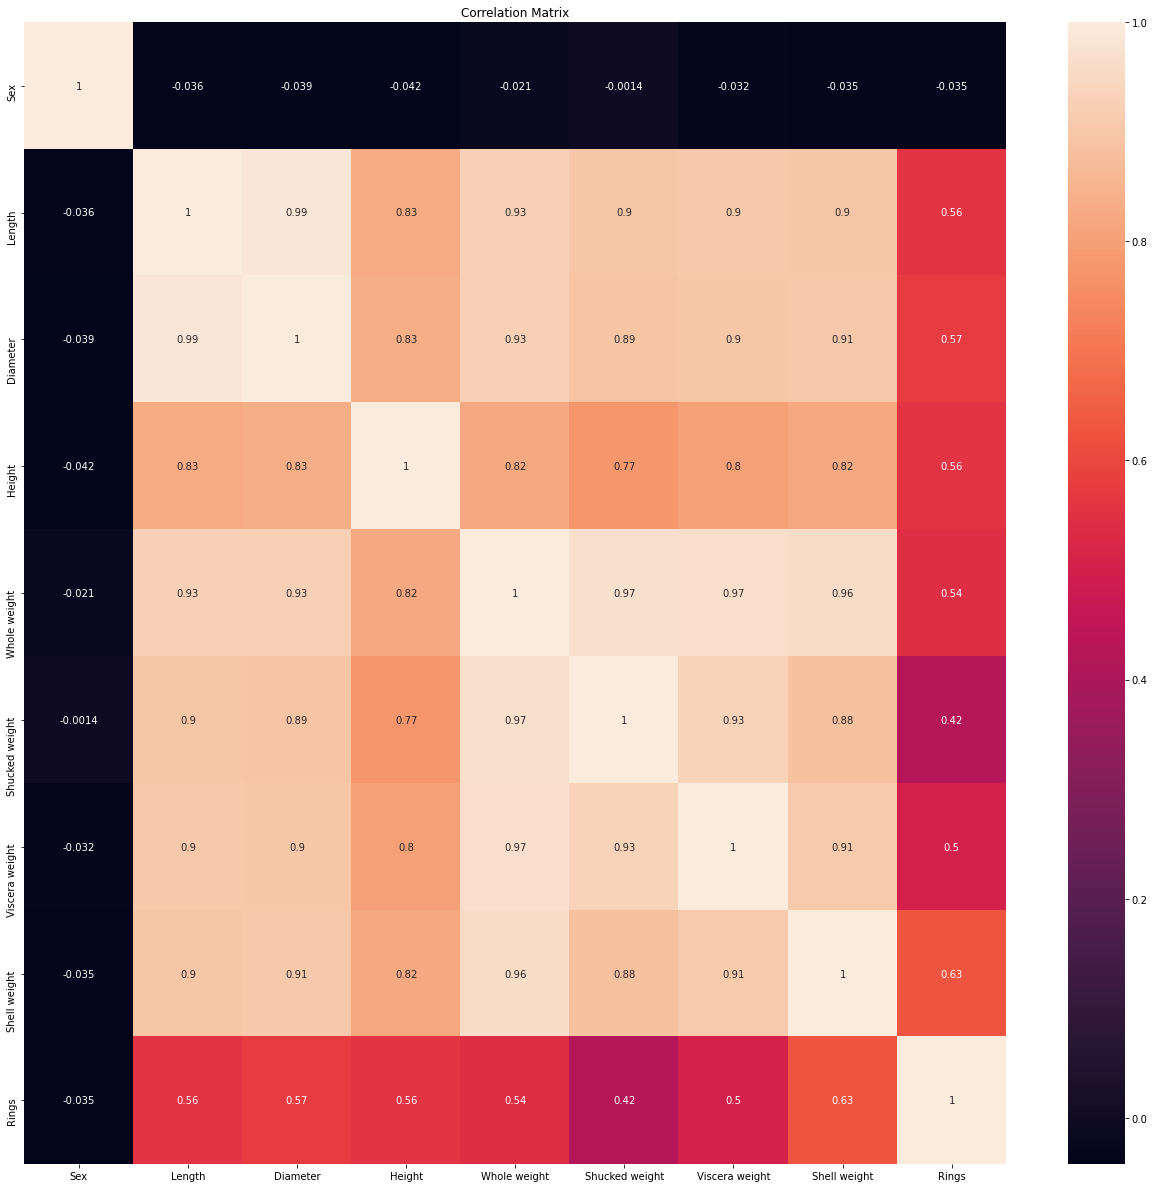

In [16]:
plt.figure(figsize= [22,21])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

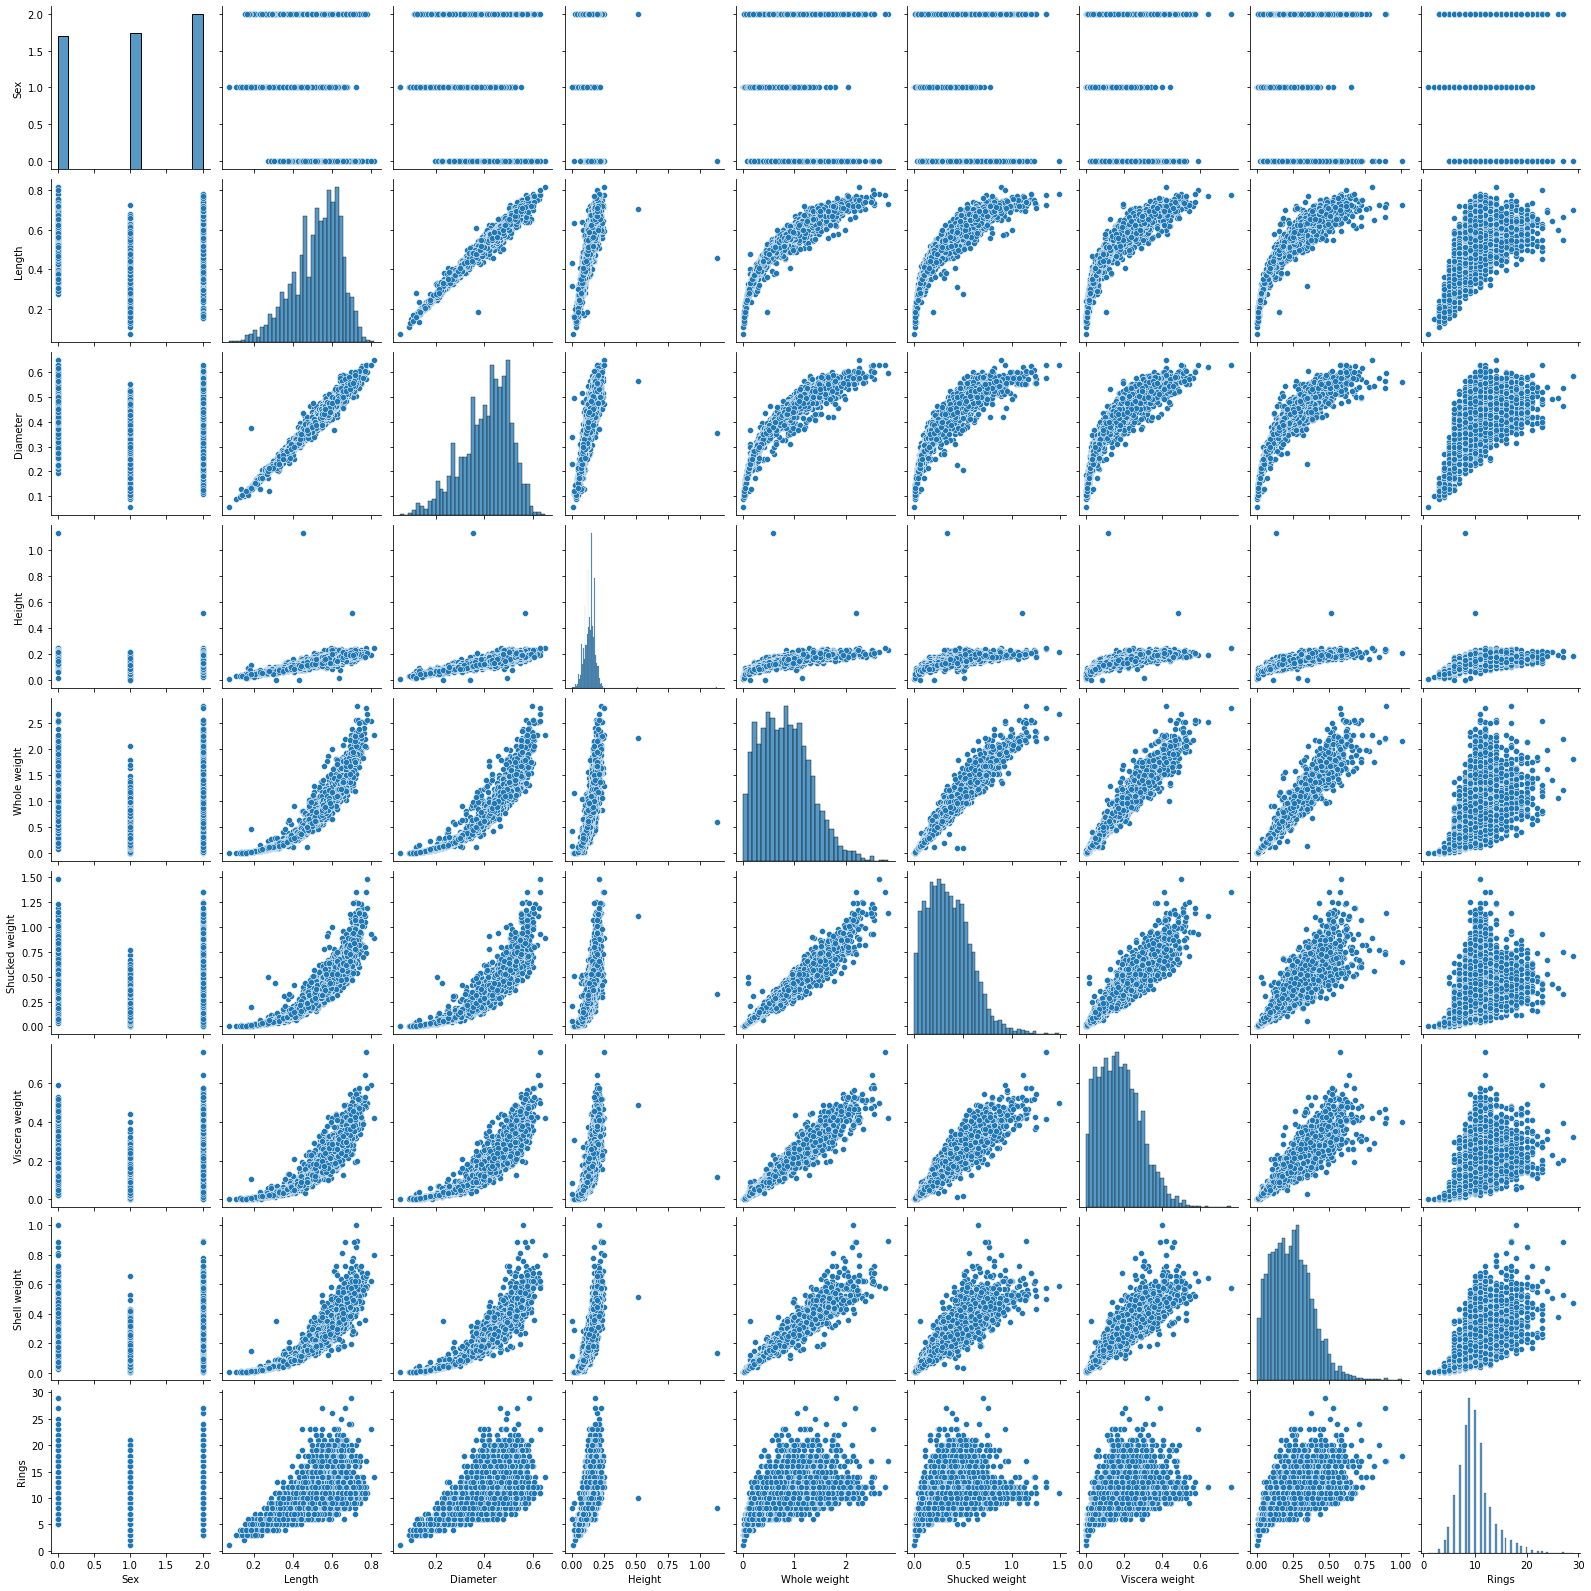

In [17]:
sns.pairplot(data=df)

In [18]:

# After analysing pairplot,we can see co-relation between features,As of now not dropping any feature

In [19]:
#spliting into features and label
x=df.drop(columns=['Rings'])
y=df['Rings']

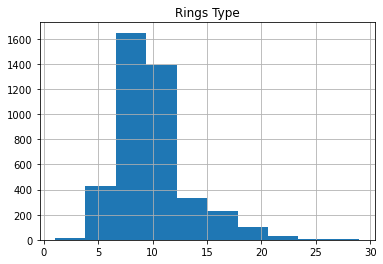

In [20]:
# Rings distribution 
df['Rings'].hist(grid=True)
plt.title("Rings Type")
plt.show()

In [21]:
# Standarizing the data
scalar=StandardScaler()
X_Scaled=scalar.fit_transform(x)

In [22]:
#For VIF,data should be standarized first
# VIF can act as feature selection technique in case VIF>5
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_Scaled,i)for i in range (X_Scaled.shape[1])]

In [23]:
vif['Features']=x.columns

In [24]:
vif

,vif,Features
0,1.010580,Sex
1,40.771963,Length
2,41.858341,Diameter
3,3.560886,Height
4,109.593589,Whole weight
5,28.434776,Shucked weight
6,17.367103,Viscera weight
7,21.258423,Shell weight


In [25]:
#Droping the features and label based on corelation between them and label
x=df.drop(columns=['Rings','Whole weight','Length'],axis=1)
y=df['Rings']

In [26]:
# Standarizing the data
scalar=StandardScaler()
X_Scaled=scalar.fit_transform(x)

In [27]:
#For VIF,data should be standarized first
# VIF can act as feature selection technique in case VIF>5
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_Scaled,i)for i in range (X_Scaled.shape[1])]

In [28]:
vif['Features']=x.columns

In [29]:
vif

,vif,Features
0,1.010568,Sex
1,8.231959,Diameter
2,3.556826,Height
3,8.791880,Shucked weight
4,10.604168,Viscera weight
5,7.781461,Shell weight


In [30]:
#Since Model accuracy is very low,dropping few of features to remove multi colinearity 
# still,few features are having greater thean 5 but will not drop more features

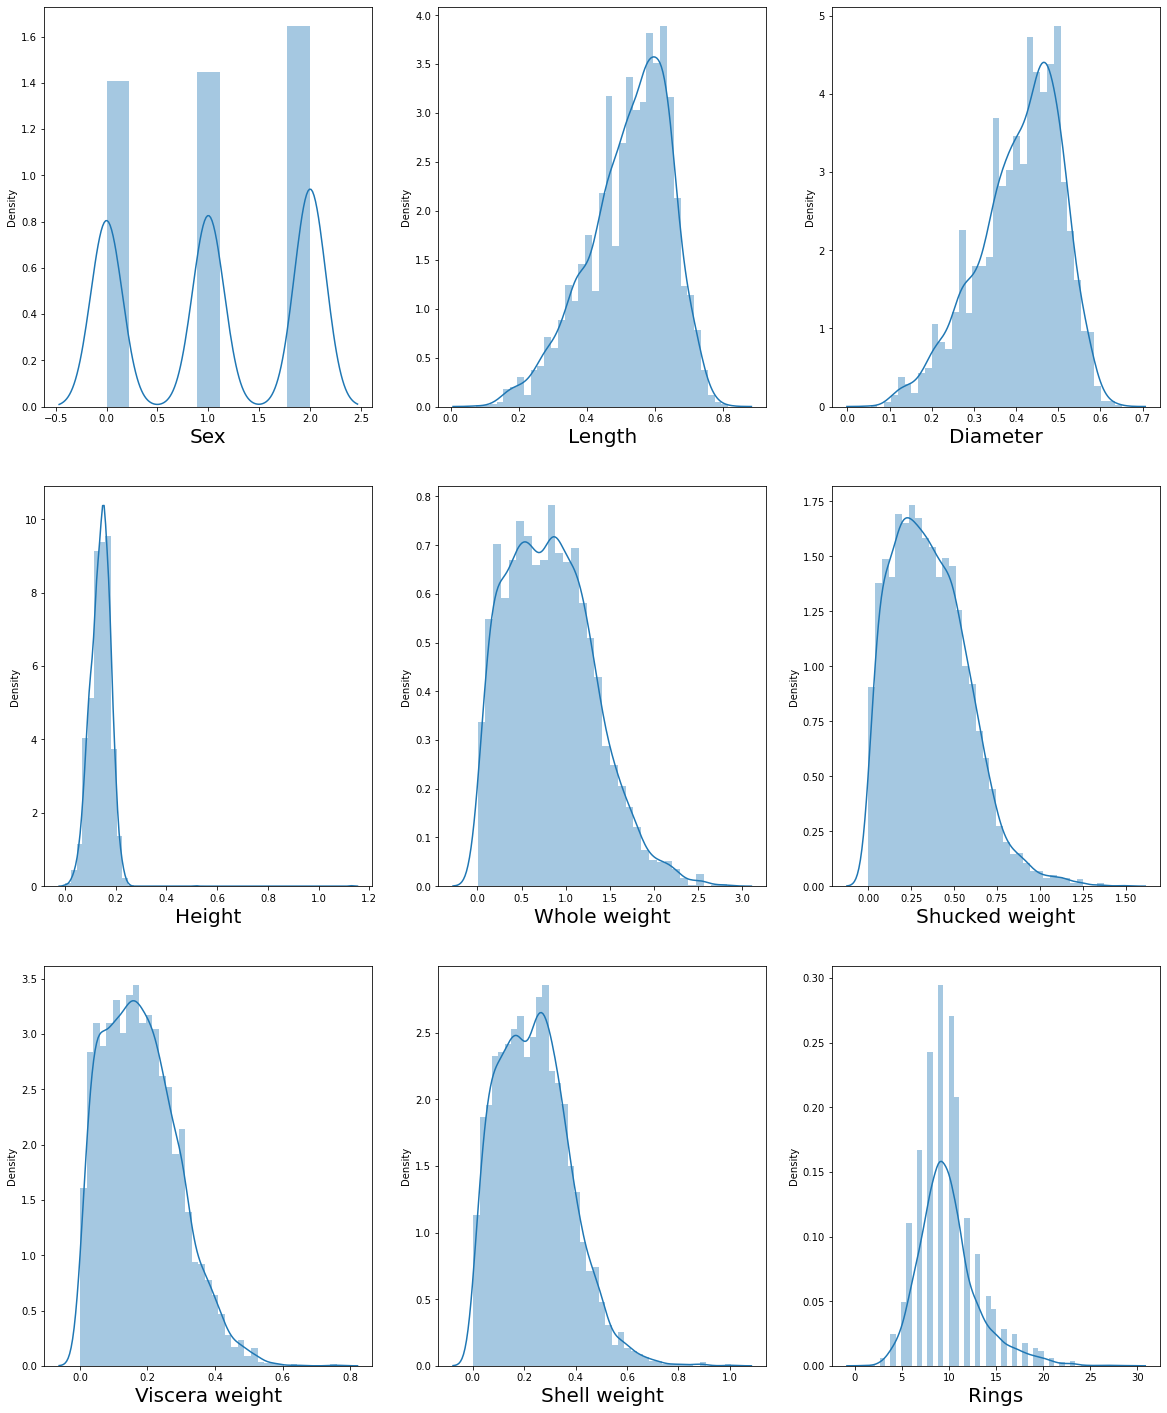

In [31]:
# Analysing feature distribution 

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [32]:
# Rename features in order to apply boxplot outlier treatment
df=df.rename(columns={'Whole weight':'Whole_weight','Shucked weight':'Shucked_weight',
                         'Viscera weight':'Viscera_weight','Shell weight':'Shell_weight'})

In [33]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [34]:
q1=df.quantile(0.25)

#3rd quantile

q3=df.quantile(0.75)

# IQR

iqr=q3-q1

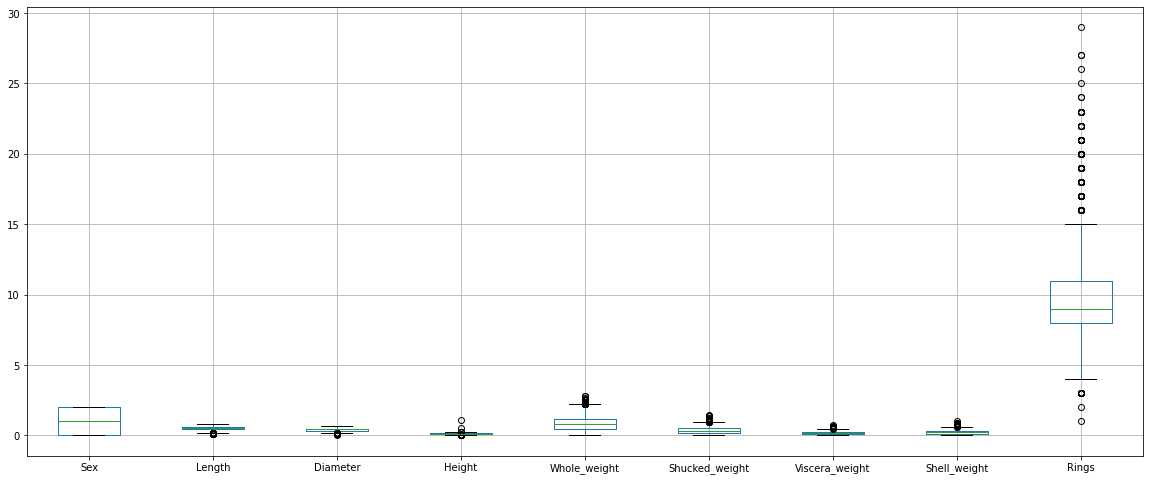

In [35]:
df.boxplot(figsize=[20,8],)
plt.subplots_adjust(bottom=.1)
plt.show()

In [36]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [37]:
#Outlier treatment

In [38]:
q1=df.quantile(0.25)

#3rd quantile

q3=df.quantile(0.75)

# IQR

iqr=q3-q1

In [39]:
index=np.where(df['Height']>(q3.Height +(1.5*iqr.Height)))
df=df.drop(df.index[index])
df.reset_index()

,index,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4167,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4168,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4169,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4170,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [40]:
index=np.where(df['Shucked_weight']>(q3.Shucked_weight +(1.5*iqr.Shucked_weight)))
df=df.drop(df.index[index])
df.reset_index()

,index,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4121,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4122,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4123,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4124,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [41]:
index=np.where(df['Viscera_weight']>(q3.Viscera_weight +(1.5*iqr.Viscera_weight)))
df=df.drop(df.index[index])
df.reset_index()

,index,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4112,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4113,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4114,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4115,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [42]:
index=np.where(df['Shell_weight']>(q3.Shell_weight +(1.5*iqr.Shell_weight)))
df=df.drop(df.index[index])
df.reset_index()

,index,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4085,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4086,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4087,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4088,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [43]:
index=np.where(df['Diameter']<(q1.Diameter -(1.5*iqr.Diameter)))
df=df.drop(df.index[index])
df.reset_index()

,index,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4026,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4027,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4028,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4029,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [44]:
index=np.where(df['Height']<(q1.Height -(1.5*iqr.Height)))
df=df.drop(df.index[index])
df.reset_index()

,index,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4023,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4024,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4025,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4026,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


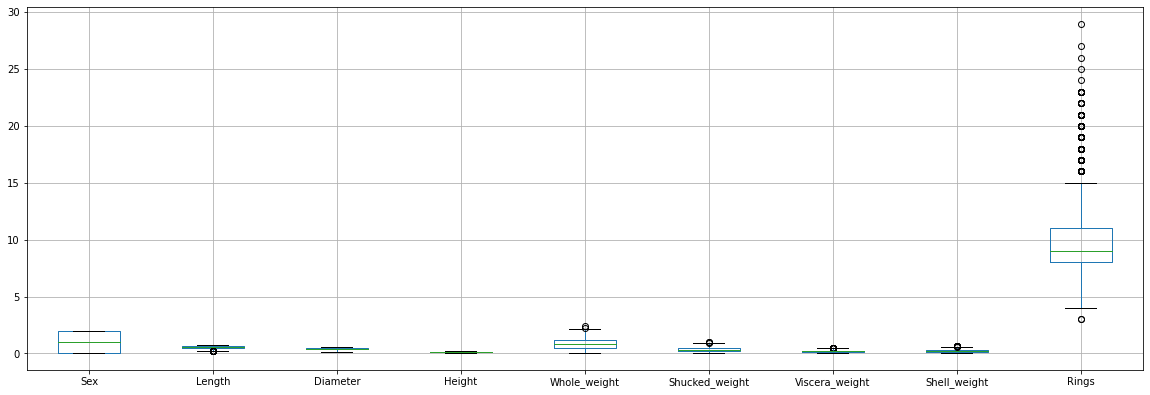

In [45]:
# checking box plot to see outlier 
df.boxplot(figsize=[20,8],)
plt.subplots_adjust(bottom=.25)
plt.show()

In [46]:
# Now,removed all outlier with boxplot oultlier treatment

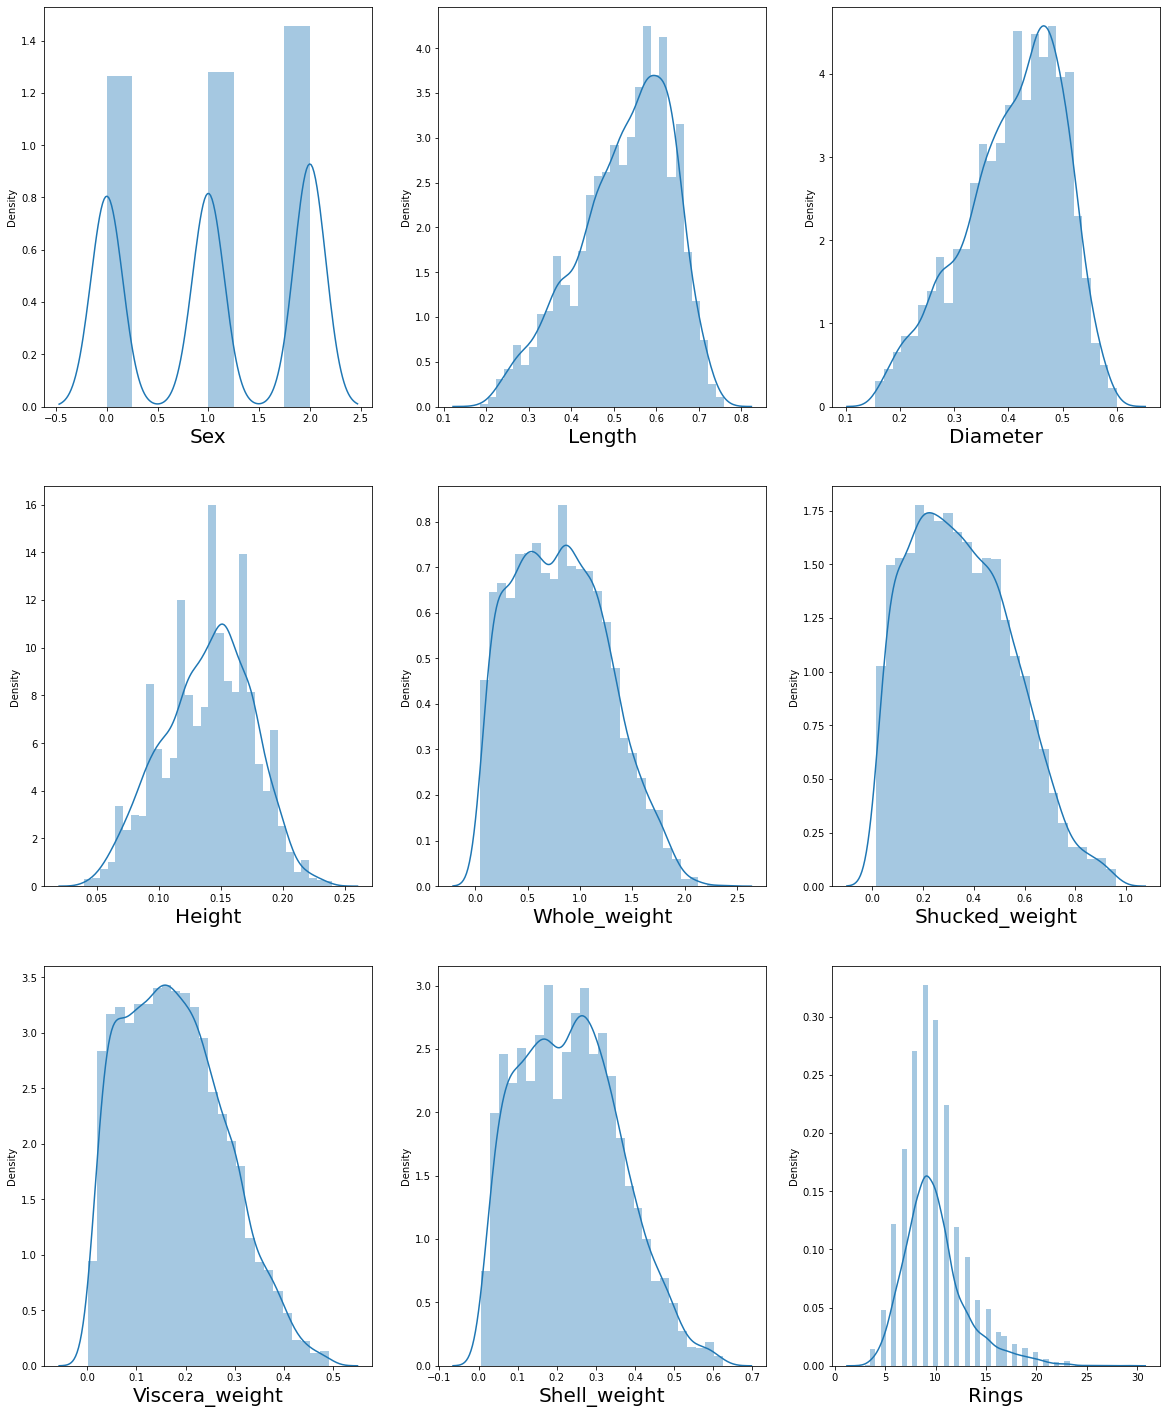

In [47]:
# Analysing feature distribution after oullier treatment

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [48]:
# Skewness is looking better

In [127]:
#spliting into features and label
x=df.drop(columns=['Rings','Whole_weight','Length','Viscera_weight'],axis=1)
y=df['Rings']

In [128]:
x.columns

Index(['Sex', 'Diameter', 'Height', 'Shucked_weight', 'Shell_weight'], dtype='object')

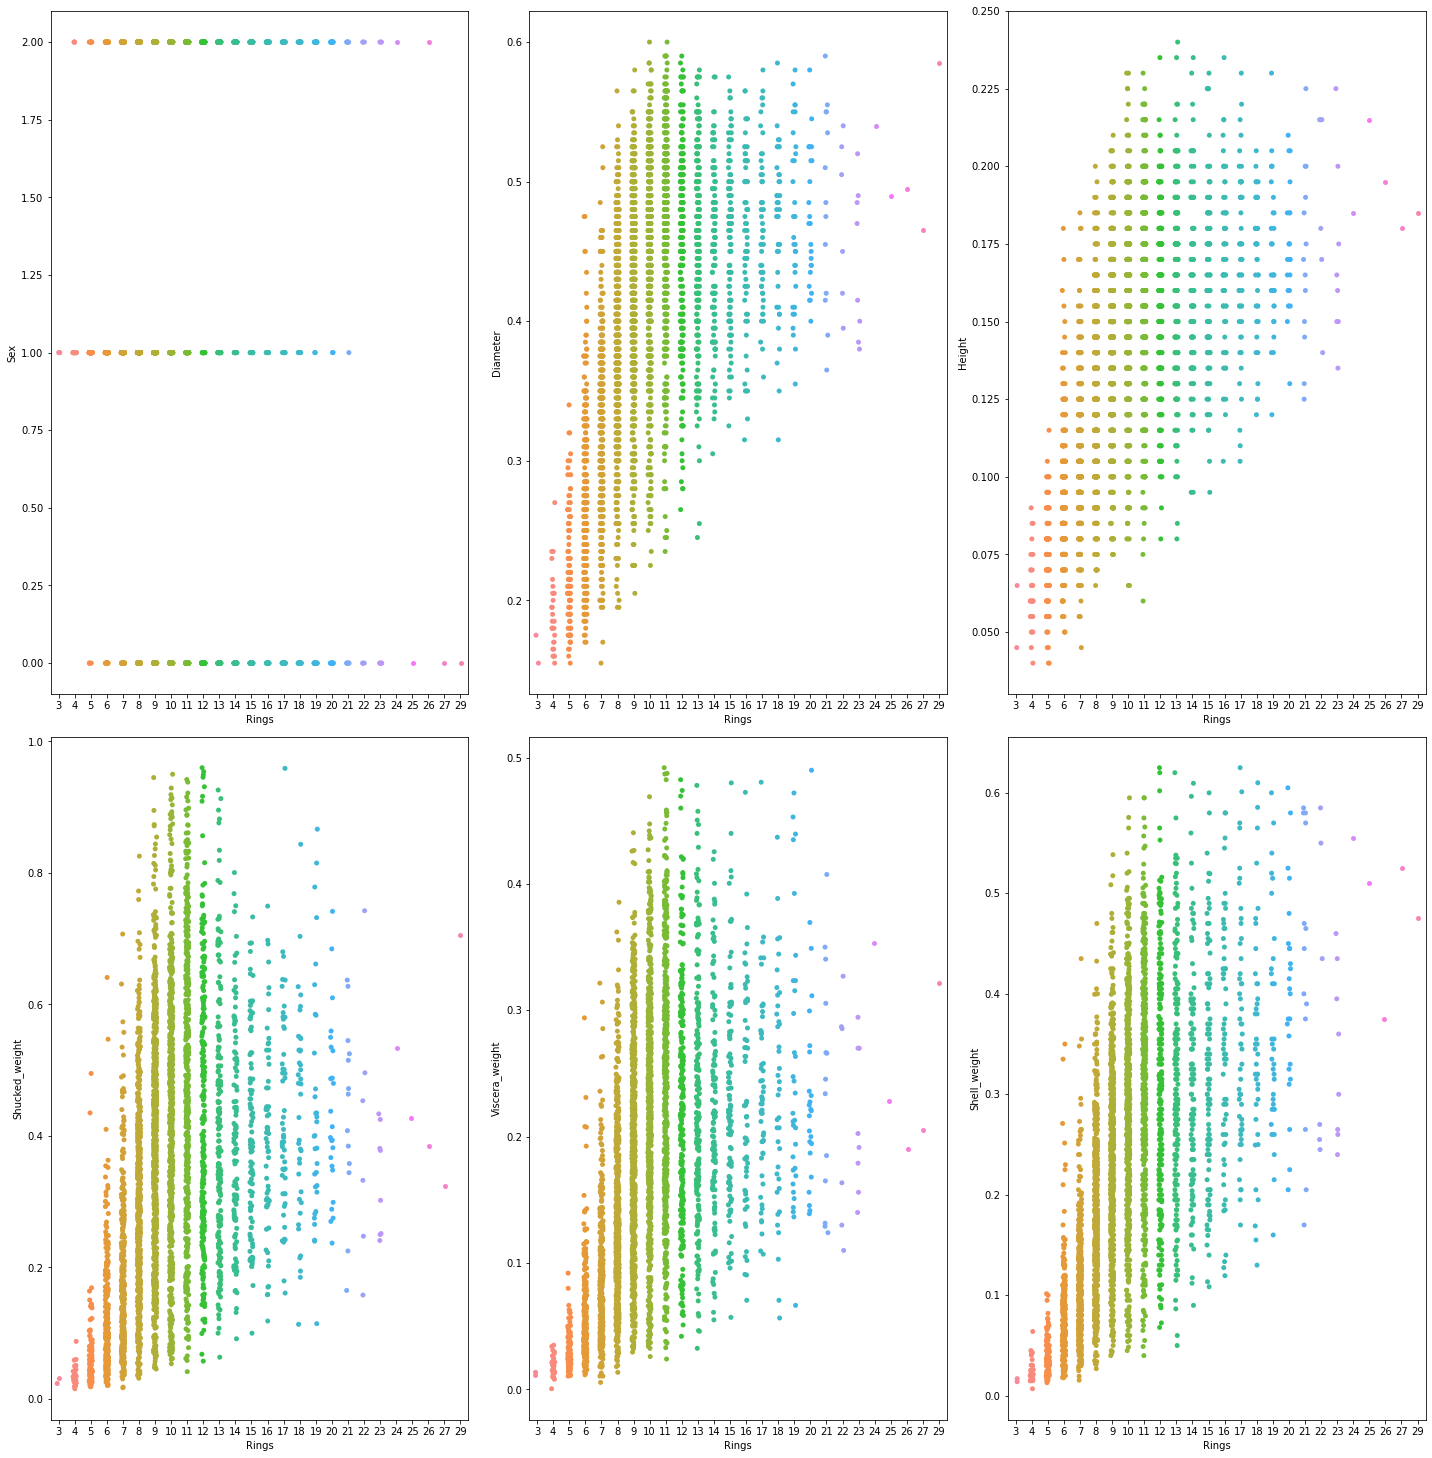

In [51]:
# Analysing relation between each feature and label
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in x:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.tight_layout()

In [52]:
# Positive trend observed between each feature and label

In [129]:
# Importind Decesion tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [130]:
# Standarizing the data
scalar=StandardScaler()
X_Scaled=scalar.fit_transform(x)

In [55]:

maxAccu=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test =train_test_split(X_Scaled,y,test_size=.30,random_state=i)
    DT=DecisionTreeClassifier()
    DT.fit(x_train,y_train)
    predrf=DT.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state",maxRS)

Best accuracy is 0.22994210090984285 on Random_state 615


In [131]:
#Creating Train test split
x_train,x_test,y_train,y_test =train_test_split(X_Scaled,y,test_size=.30,random_state=maxRS)

In [132]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [176]:
#Linera Regression

from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)
preddt=LR.predict(x_test)
print(mean_squared_error(y_test,preddt))
print(r2_score(y_test,preddt))
print(mean_absolute_error(y_test,preddt))
LR.score(x_test,y_test)

4.523900753503885
0.5263717794152099
1.5536329217167681


0.5263717794152099

In [177]:
# DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(mean_squared_error(y_test,preddt))
print(r2_score(y_test,preddt))
print(mean_absolute_error(y_test,preddt))
dt.score(x_test,y_test)

9.640198511166252
-0.009277240087865346
2.1331679073614556


-0.009277240087865346

In [174]:
#RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
pred_RF=RF.predict(x_test)
print(mean_squared_error(y_test,pred_RF))
print(r2_score(y_test,pred_RF))
print(mean_absolute_error(y_test,pred_RF))
RF.score(x_test,y_test)


5.191207857733664
0.45650829354736777
1.5888254755996691


0.45650829354736777

In [164]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(LR,x,y,cv=5)
print("Cross Validation Score fo Linear Regression :",scr.mean())

Cross Validation Score fo Linear Regression : 0.35676091760742273


In [165]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt,x,y,cv=5)
print("Cross Validation Score fo Linear Regression :",scr.mean())

Cross Validation Score fo Linear Regression : 0.36484521137999604


In [167]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(RF,x,y,cv=5)
print("Cross Validation Score fo Linear Regression :",scr.mean())

Cross Validation Score fo Linear Regression : 0.34429078093173865


In [ ]:
              Model Accuracy      Cross Validation Score      Diff
LR                  52                         35                  17
DT                 -0.6                        36                  37
RF                  45                         34                  11


Since diff is less fro RF, RF is the best model 

In [137]:
#Hyperparameter tuning

In [138]:
#Linear Regression

In [139]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [140]:
lassCV= LassoCV(alphas=None,max_iter=1000,normalize=True)
lassCV.fit(x_train,y_train)

LassoCV(normalize=True)

In [141]:
# best Alpha parameter (Alpha = learning rate)
alpha =lassCV.alpha_
alpha

3.5037440522836454e-05

In [142]:
# now that we have best parameter,lets use lasso regression and see how well our data ftted befor
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)


Lasso(alpha=3.5037440522836454e-05)

In [143]:
lasso_reg.score(x_test,y_test)

0.5263734960621681

In [ ]:
#Fine Tuning Random Forest

In [144]:
from sklearn.model_selection import GridSearchCV

In [145]:
# Create a search grid of parameters that will be shuffled through

param_grid = {'bootstrap':['True'],
              'max_depth': [10, 20,],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10]}

In [146]:
# Using the random grid and searching for best hyperparameters

rf = RandomForestRegressor() #creating base model

In [147]:
# Instantiate the grid search model

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 

                          cv = 3, n_jobs = -1, verbose = 2)

In [148]:
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': ['True'], 'max_depth': [10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [149]:
grid_search.best_params_

{'bootstrap': 'True',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10}

In [150]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 

                          cv = 3, n_jobs = -1, verbose = 2)

In [151]:
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': ['True'], 'max_depth': [10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [152]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'bootstrap': 'True', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}


In [153]:
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print(mean_squared_error(y_test,predrf))
print(r2_score(y_test,predrf))
print(mean_absolute_error(y_test,predrf))
rf.score(x_test,y_test)

5.2421192721257235
0.45117814067270756
1.5935814722911497


0.45117814067270756

In [ ]:
After hyper parameter tuning,Model Accuracy is 45%
